In [1]:
from detection import dataset
import os

static_dir = "data/static"
dataset.create_from_frames(range(76), os.path.join(static_dir, "png"), os.path.join(static_dir, "txt"))

frame 0..
frame 1..
frame 2..
frame 3..
frame 4..
frame 5..
frame 6..
frame 7..
frame 8..
frame 9..
frame 10..
frame 11..
frame 12..
frame 13..
frame 14..
frame 15..
frame 16..
frame 17..
frame 18..
frame 19..
frame 20..
frame 21..
frame 22..
frame 23..
frame 24..
frame 25..
frame 26..
frame 27..
frame 28..
frame 29..
frame 30..
frame 31..
frame 32..
frame 33..
frame 34..
frame 35..
frame 36..
frame 37..
frame 38..
frame 39..
frame 40..
frame 41..
frame 42..
frame 43..
frame 44..
frame 45..
frame 46..
frame 47..
frame 48..
frame 49..
frame 50..
frame 51..
frame 52..
frame 53..
frame 54..
frame 55..
frame 56..
frame 57..
frame 58..
frame 59..
frame 60..
frame 61..
frame 62..
frame 63..
frame 64..
frame 65..
frame 66..
frame 67..
frame 68..
frame 69..
frame 70..
frame 71..
frame 72..
frame 73..
frame 74..
frame 75..


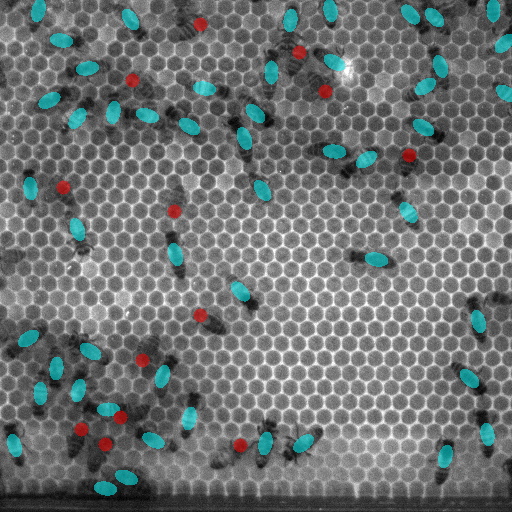

In [3]:
from plots import segm_map

frame_nb = 5

class_map = segm_map.plot_segm_map(frame_nb)
display(class_map)

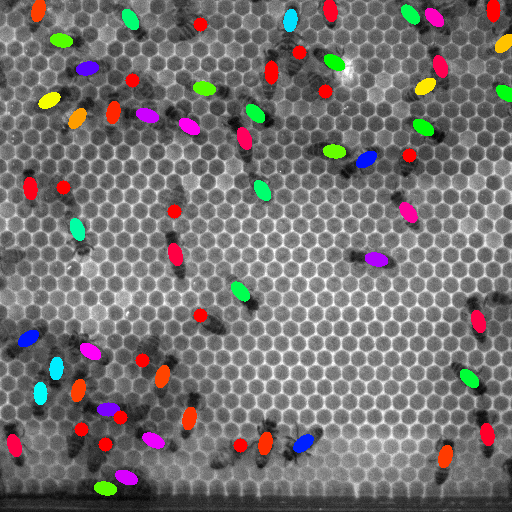

In [4]:
angle_map = segm_map.plot_angle_map(frame_nb)

display(angle_map)

In [5]:
from detection import train_detection

model, imgs, iter_nb = train_detection.run_training(return_img=True, with_augmentation=False)

Instructions for updating:
non-resource variables are not supported in the long term
Restoring checkpoint 1030..
ITERATION: 1031
TRAIN - time: 0.439 min, loss: 0.601, background overlap: 0.927, foreground overlap: 0.946, class error: 0.066, angle error: 0.515
TEST - time: 0.027 min, loss: 2.995, background overlap: 0.925, foreground overlap: 0.882, class error: 0.229, angle error: 0.460
ITERATION: 1032
TRAIN - time: 2.589 min, loss: 1.746, background overlap: 0.904, foreground overlap: 0.856, class error: 0.174, angle error: 0.409
TEST - time: 0.056 min, loss: 2.120, background overlap: 0.857, foreground overlap: 0.916, class error: 0.154, angle error: 0.455
ITERATION: 1033
TRAIN - time: 0.342 min, loss: 1.128, background overlap: 0.888, foreground overlap: 0.822, class error: 0.225, angle error: 0.496
TEST - time: 0.027 min, loss: 1.864, background overlap: 0.859, foreground overlap: 0.877, class error: 0.192, angle error: 0.371
ITERATION: 1034
TRAIN - time: 2.572 min, loss: 1.384, ba

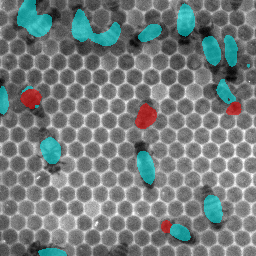

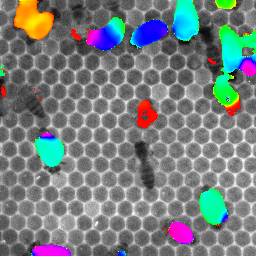

In [6]:
batch_i = 2 # batch size by default = 4, you can change this variable from 0..batch_size - 1
display(imgs[batch_i][0])
display(imgs[batch_i][1])

In [7]:
model, imgs, iter_nb = train_detection.run_training_on_model(model, iter_nb, n_iters=10, return_img=True)

ITERATION: 1041
TRAIN - time: 0.355 min, loss: 0.780, background overlap: 0.915, foreground overlap: 0.904, class error: 0.126, angle error: 0.532
TEST - time: 0.023 min, loss: 3.887, background overlap: 0.896, foreground overlap: 0.873, class error: 0.147, angle error: 0.396
ITERATION: 1042
TRAIN - time: 2.638 min, loss: 1.332, background overlap: 0.915, foreground overlap: 0.930, class error: 0.090, angle error: 0.408
TEST - time: 0.052 min, loss: 0.912, background overlap: 0.915, foreground overlap: 0.896, class error: 0.121, angle error: 0.458
ITERATION: 1043
TRAIN - time: 0.346 min, loss: 0.742, background overlap: 0.916, foreground overlap: 0.907, class error: 0.124, angle error: 0.487
TEST - time: 0.024 min, loss: 2.273, background overlap: 0.898, foreground overlap: 0.885, class error: 0.134, angle error: 0.338
ITERATION: 1044
TRAIN - time: 2.641 min, loss: 1.193, background overlap: 0.923, foreground overlap: 0.942, class error: 0.079, angle error: 0.355
TEST - time: 0.051 min

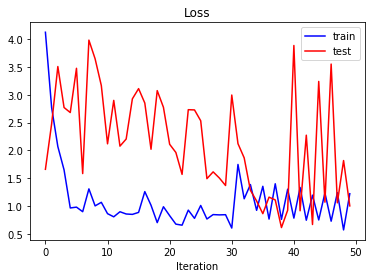

In [8]:
from utils import paths
import numpy as np
import matplotlib.pyplot as plt

acc = np.loadtxt(os.path.join(paths.CHECKPOINT_DIR, "unet2", "accuracy.csv"), delimiter=',')
train_acc = acc[acc[:,0]==0,:]
test_acc = acc[acc[:,0]==1,:]

params = { 1:"Loss", 2:"Background overlap", 3:"Foreground overlap", 4: "Class error", 5: "Angle error"}
param = 1
_ = plt.plot(range(train_acc.shape[0]), train_acc[:,param], color='b', label="train")
_ = plt.plot(range(test_acc.shape[0]), test_acc[:,param], color='r', label='test')
_ = plt.title(params[param])
_ = plt.xlabel("Iteration")
_ = plt.legend()